# Philippine Energy Use

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
countries = pd.read_csv('data/0200_Philippine_Energy_Use/countries.csv')
indicators = pd.read_csv('data/0200_Philippine_Energy_Use/indicators.csv')

In [ ]:
mainland = [ 'Cambodia', 'Lao PDR', 'Myanmar', 'Malaysia', 'Thailand', 'Vietnam']
maritime = [ 'Indonesia', 'Philippines', 'East Malaysia', 'Brunei', 'Singapore', 'Timor-Leste']

In [ ]:
sea_countries = countries[countries.ShortName.isin(mainland + maritime)]
sea_countries_mask = indicators.CountryCode.isin(sea_countries.CountryCode)

In [ ]:
rural_indicator = 'EG.ELC.ACCS.RU.ZS'
urban_indicator = 'EG.ELC.ACCS.UR.ZS'
total_indicator = 'EG.ELC.ACCS.ZS'

In [ ]:
rural_ec_mask = indicators.IndicatorCode == rural_indicator
urban_ec_mask = indicators.IndicatorCode == urban_indicator
total_ec_mask = indicators.IndicatorCode == total_indicator

In [ ]:
pivot_args = {'index': ['CountryCode', 'CountryName', 'Year'], 'columns': 'IndicatorCode', 'values': 'Value'}

In [52]:
sea_ec_rural = indicators[sea_countries_mask & rural_ec_mask].pivot_table(**pivot_args).reset_index().rename(columns={rural_indicator: 'Value'})
sea_ec_urban = indicators[sea_countries_mask & urban_ec_mask].pivot_table(**pivot_args).reset_index().rename(columns={urban_indicator: 'Value'})
sea_ec_total = indicators[sea_countries_mask & total_ec_mask].pivot_table(**pivot_args).reset_index().rename(columns={total_indicator: 'Value'})

In [55]:
sea_ec_rural[sea_ec_rural['CountryCode'] == 'PHL']

IndicatorCode,CountryCode,CountryName,Year,Value
24,PHL,Philippines,1990,46.4
25,PHL,Philippines,2000,51.9
26,PHL,Philippines,2010,72.8
27,PHL,Philippines,2012,81.5


In [84]:
plot_args = {'y': 'Value', 'x': 'Year', 'ylim': (0, 100), 'legend': False, 'rot': 0}

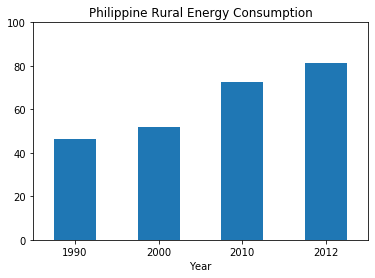

In [86]:
ph_ec_rural = sea_ec_rural[sea_ec_rural['CountryCode'] == 'PHL']
ph_ec_rural.plot.bar(**plot_args, title='Philippine Rural Energy Consumption')

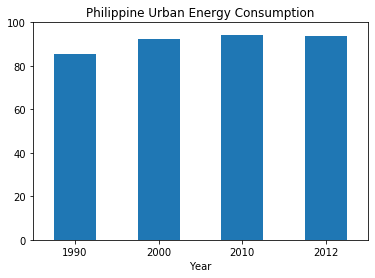

In [87]:
ph_ec_urban = sea_ec_urban[sea_ec_urban['CountryCode'] == 'PHL']
ph_ec_urban.plot.bar(**plot_args, title='Philippine Urban Energy Consumption')

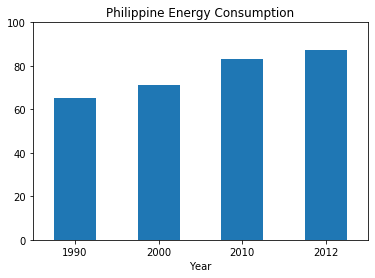

In [88]:
ph_ec_total = sea_ec_total[sea_ec_total['CountryCode'] == 'PHL']
ph_ec_total.plot.bar(**plot_args, title='Philippine Energy Consumption')